**This is the second half of the module 5 assignment. The full module 5 assignment will be due on Wednesday, April 6 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas.** 

**We discussed 1 and 2 dimensional random walks in class last week. In this assignment, you'll explore the behavior of particles and ensembles of particles performing random walks, but with slightly modified behaviors.  In particular, one modification that can lead to the formation of a variety of interesting patterns is called [Diffusion Limited Aggregation](http://paulbourke.net/fractals/dla/) (DLA). This week's assignment builds upon and makes some modifications to the last few questions in last week's assignment.**

**(new f) A crucial part of DLA is that, when a particle hits the boundary, it becomes stuck and sticky. So now, assume your particles are *circles* of diameter = 1. Once they reach the bottom boundary, they stick and become attractive to other particles, so that if a new particle touches a bound particle, the new particle becomes stuck to the bound particle. *For the remainder of this assignment, assume that the bottom boundary is composed of a horizontal string of touching circles, each with diameter = 1 and centered at $y=0$.* Based on our discussion in class on Wednesday, explain how you would implement this into your code. Specifically, how would you manage overlaps between falling particles and the boundary? What parameter choices might cause this approach to fail, and considerations are necessary to ensure that this approach is successful?**

The way we detect "collisions" now change. Instead of checking if a rectangle overlaps another, we now check if a circle overlaps another. If so, we apply a "force" such that the particle is now barely touching another particle rather than freezing in place (overlapped). We can do this by observing the last position of all particles. It is important that we considered a very small time step and step size so that we are sensitive to collisions. 

**(new g) Add this particle size effect and modified boundary into your code.  *To make things simpler, you can extend the lower boundary (and ignore side walls) so that you do not have to worry about edge effects. Also modify your code so that only one particle falls at a time, and a new particle begins to fall only after the previous particle has become a part of the boundary.* As each particle joins the boundary, it should become immoble and sticky, which will change the boundary that subsequent particles can adhere to. Your code should output the x and y positions of the particles as a function of time, as well as the x and y positions of the wall (for plotting purposes).**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

def walk_sticky(time_steps, step_size, H, bias, particles):
  x = np.zeros([time_steps])
  y = np.zeros([time_steps])

  x[0] = np.random.rand(1) * H
  y[0] = H

  is_stuck = False

  for i in range(1, time_steps):
    ang = 2 * np.pi * (np.random.rand(1) - 0.5) # uniformly distributed angles between -pi and +pi
    new_x = x[i - 1] + (step_size * np.cos(ang))
    if np.random.rand(1) <= (0.5 + (bias / 2)):
        new_y = y[i - 1] - abs((step_size * np.sin(ang)))
    else:
      new_y = y[i - 1] + abs((step_size * np.sin(ang)))

    if not is_stuck:
      y[i] = max(0, min(new_y, H))
      if y[i] == 0:
        x[i] = x[i - 1]
        is_stuck = True
      else:
        x[i] = max(0, min(new_x, H))
      
      for particle in particles:

        # The particle get's stuck in it's last position
        stuck_x = particle[0][-1]
        stuck_y = particle[1][-1]
        
        d = np.sqrt((stuck_x - x[i])**2+(stuck_y - y[i])**2)
        if d < 1: # if the circles are overlapping
          is_stuck = True
          # Hard shell repulsion
          delta = d - 1 # r1 + r2 = 0.5 + 0.5 = 1
          phi = math.atan2(stuck_y - y[i], stuck_x - x[i])

          xc = delta*np.cos(phi)
          yc = delta*np.sin(phi)

          x[i] = x[i] + xc
          y[i] = y[i] + yc

    else:
      x[i] = x[i - 1]
      y[i] = y[i - 1]
    

  return x, y 

def ensemble_walk_sticky(N, time_step, step_size, H, attraction):
  particles = [[[x-0.5], [0]] for x in range(1, H, 2)]

  for i in range(N):
    [x, y] = walk_sticky(time_step, step_size, H, attraction, particles)
    particles.append([x, y])
  
  return particles

**(new h) Run your code using the following parameters:**

$N = 1500$

boxHeight = 60

stepSize = 0.05

stepBias = 0.01

nSteps = 10000

**Plot the initial wall particles and the final positions of all of the particles. To display the correct size associated with each particle, use the command ```circle = plt.Circle(x,y,radius=r,color='k')``` to create a single circle graphics object, and the command ```ax.add_patch(circle)``` to add this object to the axes of your plot. Write a for loop that iterates through all final positions and add each particle to the axes.  Also add all initial wall particles to the axes, using a different color. Use the command ```ax.axis('equal')``` to make the aspect ratio of the plot equal to one (so that the circular objects actually appear circular).**



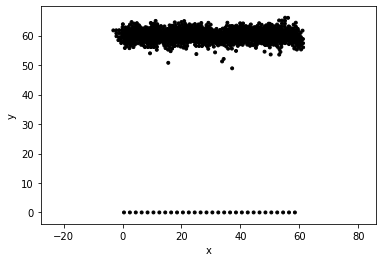

In [21]:
particles = ensemble_walk_sticky(1500, 10000, 0.05, 60, 0.01)

fig,ax = plt.subplots(1, 1)

for particle in particles:
  x = particle[0][-1]
  y = particle[1][-1]
  circle = plt.Circle([x, y], radius=0.5, color='k')
  ax.add_patch(circle)

ax.set(xlabel = 'x', ylabel = 'y')
ax.axis('equal')
plt.show()

**(new i) How does your pattern compare to those in the DLA link above? How do you expect the pattern to change as you vary the  strength of the randomness compared to attraction/bias?  What do you expect the output to look like if fluctuations and attraction are comparable? What about if the strength of the attraction is much larger than the fluctuations? What about when the attraction is much smaller than the fluctuations?** 

As we increase bias and attraction, we should see more branch like structures as particles will be "sticking" bottom up. Currently, it is random, so it is less likely that they get into a "sticky" situation. If fluctuations and attraction are comparable, then we should expect to see random patterns. If attraction is larger than fluctuations, then we should expect to see branch like patterns. If the attraction is smaller than fluctuations, then we should see chunks of particles. 

**(new j) Run your code to vary the relative strength of the attraction to the fluctuations (keeping in mind your answers for parameter considerations questions in part (f)), plot the results for the three cases discussed in the previous part, and discuss the output relative to your expectations.**


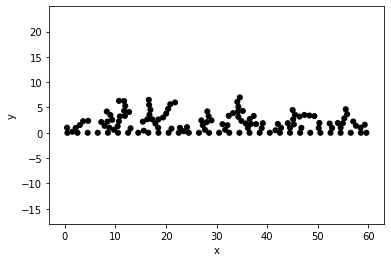

In [19]:
particles = ensemble_walk_sticky(100, 10000, 0.5, 60, 0.2)

fig,ax = plt.subplots(1, 1)

for particle in particles:
  x = particle[0][-1]
  y = particle[1][-1]

  circle = plt.Circle([x, y], radius=0.5, color='k')
  ax.add_patch(circle)

ax.set(xlabel = 'x', ylabel = 'y')
ax.axis('equal')
plt.show()

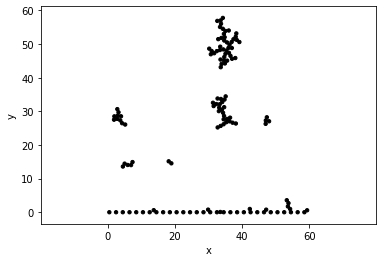

In [20]:
particles = ensemble_walk_sticky(100, 10000, 0.5, 60, 0.01)

fig,ax = plt.subplots(1, 1)

for particle in particles:
  x = particle[0][-1]
  y = particle[1][-1]

  circle = plt.Circle([x, y], radius=0.5, color='k')
  ax.add_patch(circle)

ax.set(xlabel = 'x', ylabel = 'y')
ax.axis('equal')
plt.show()

This output is what I expected. As bias increases, particles are attracted to the bottom and generate branch like structures. A decrease in bias means particles walk around more randomly. This causes different clunks to form based on where particles end up. 